### Importok

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
import zipfile
import json
import pandas as pd
os.chdir('/content/drive/MyDrive/AI_in_Data_Science/projekt_munka_viragok')
from classok import EmbeddingPlotter, EmbeddingSimilarityEvaluator, EmbeddingClassifier

### Adat betöltés

In [3]:
# Define the extracted folder path
dataset_path = "/content/drive/MyDrive/AI_in_Data_Science/projekt_munka_viragok/archive (2).zip"
extract_path = "/content/"

if os.path.exists(dataset_path):
    with zipfile.ZipFile(dataset_path, "r") as zip_ref:
        zip_ref.extractall(extract_path)
    print("Dataset extracted successfully.")
else:
    print("Zip file not found.")

# Load label mappings
with open("/content/cat_to_name.json", "r") as f:
    label_map = json.load(f)

# Define base directory and splits
base_dir = "/content/dataset"
splits = ["train", "valid"]

Dataset extracted successfully.


### Embeddingek plotolása

#### Olyan leírások, amikor a modell megkapta a virágok fajtátáját, azonban a leírásokban csak "virág"-ként szerepel, a pontos típus helyett.

/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


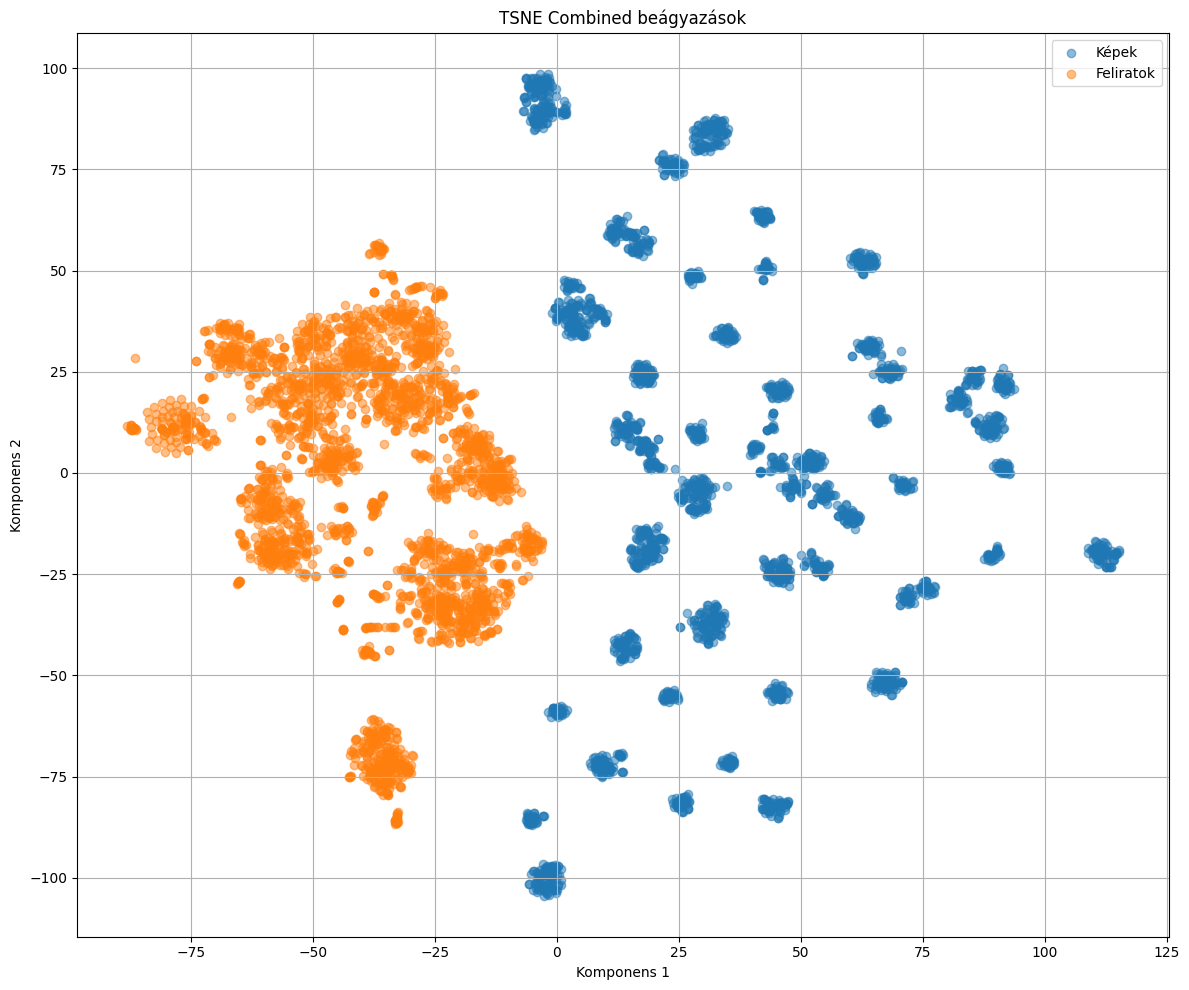

/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


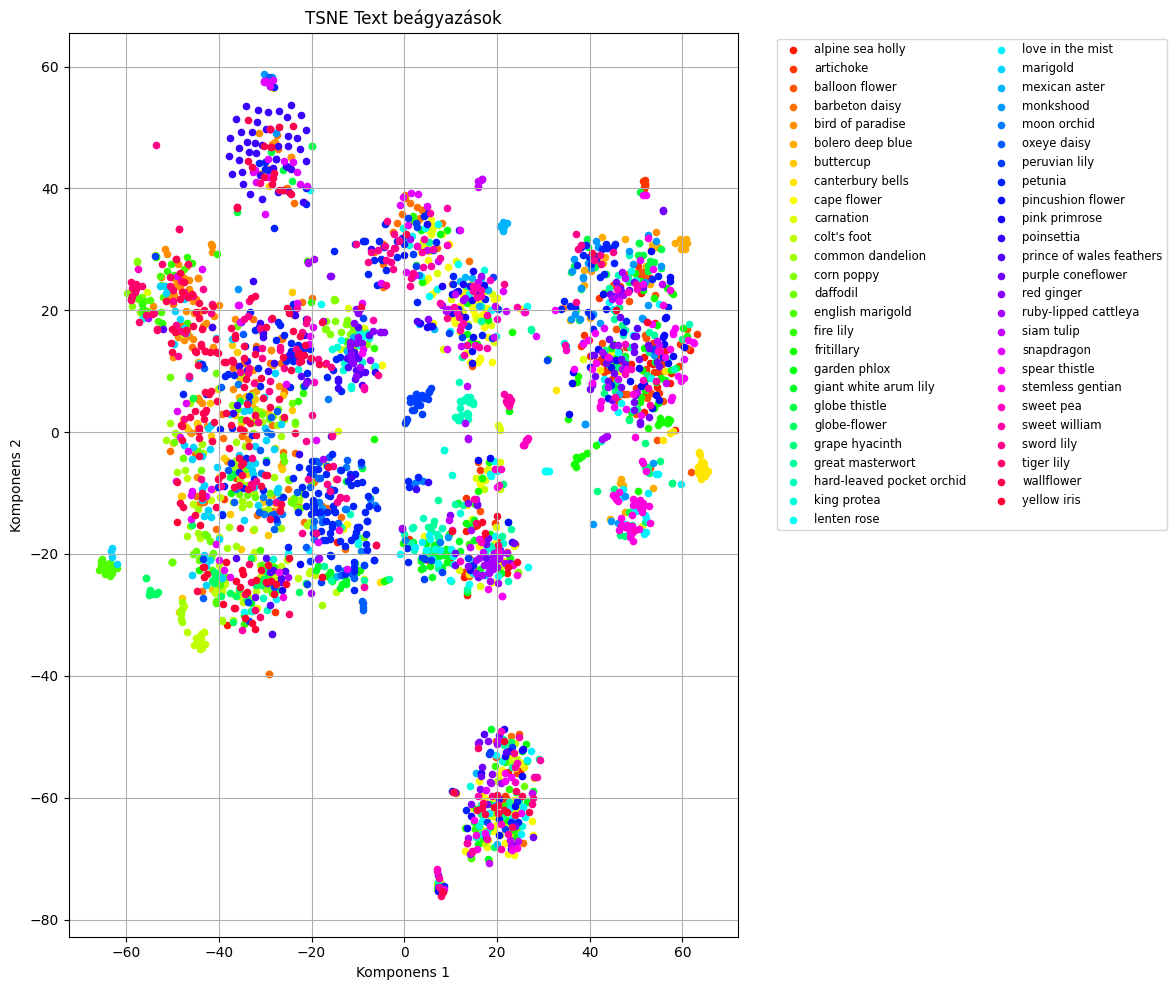

/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


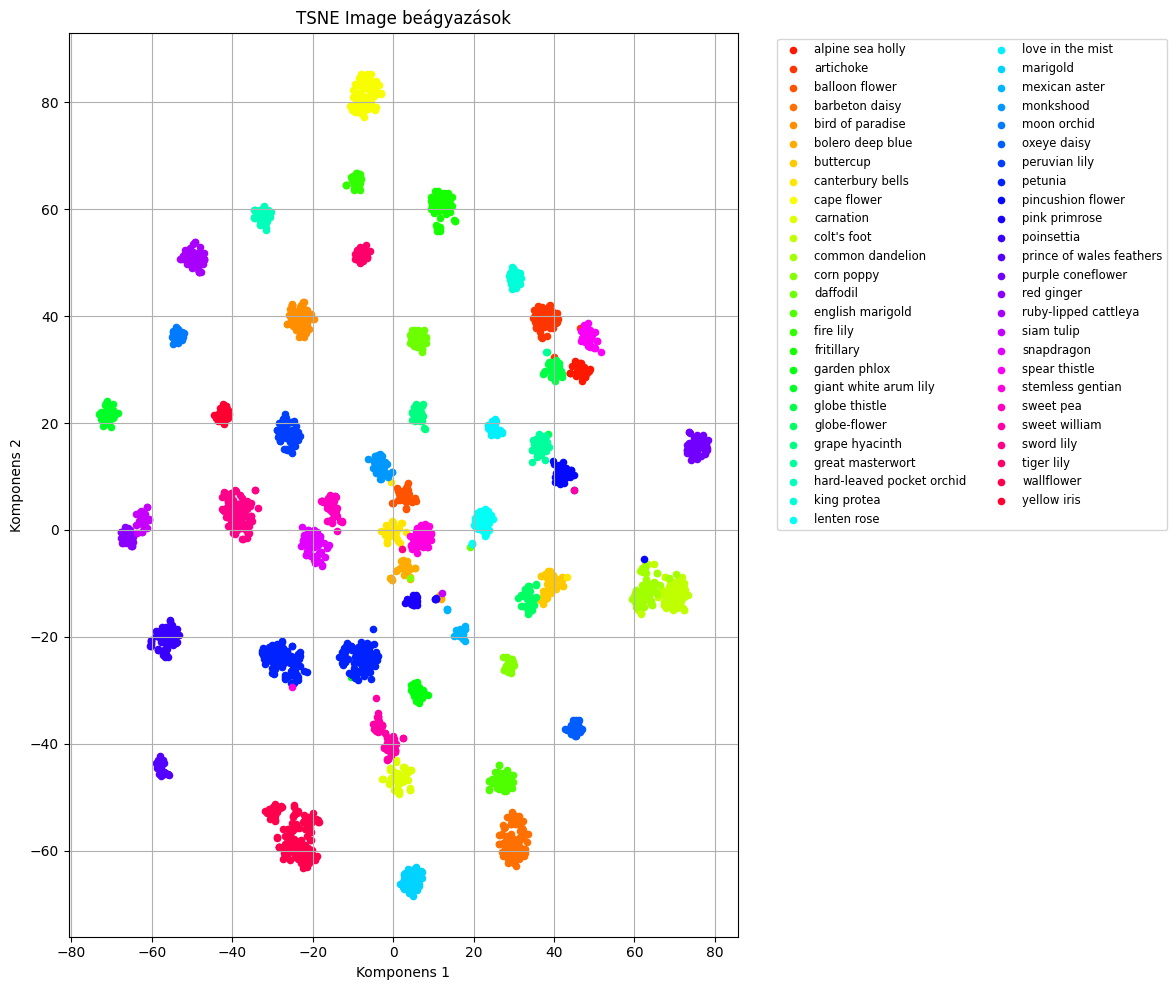

In [ ]:
plotter = EmbeddingPlotter("/content/drive/MyDrive/AI_in_Data_Science/projekt_munka_viragok/flower_embeddings_with_label_without_name.json")

plotter.plot(method="tsne", use="combined")
plotter.plot(method="tsne", use="text")
plotter.plot(method="tsne", use="image")


#### Olyan képleírások ábrázolása, amikor a modell nem kapta meg a virág típusát

/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


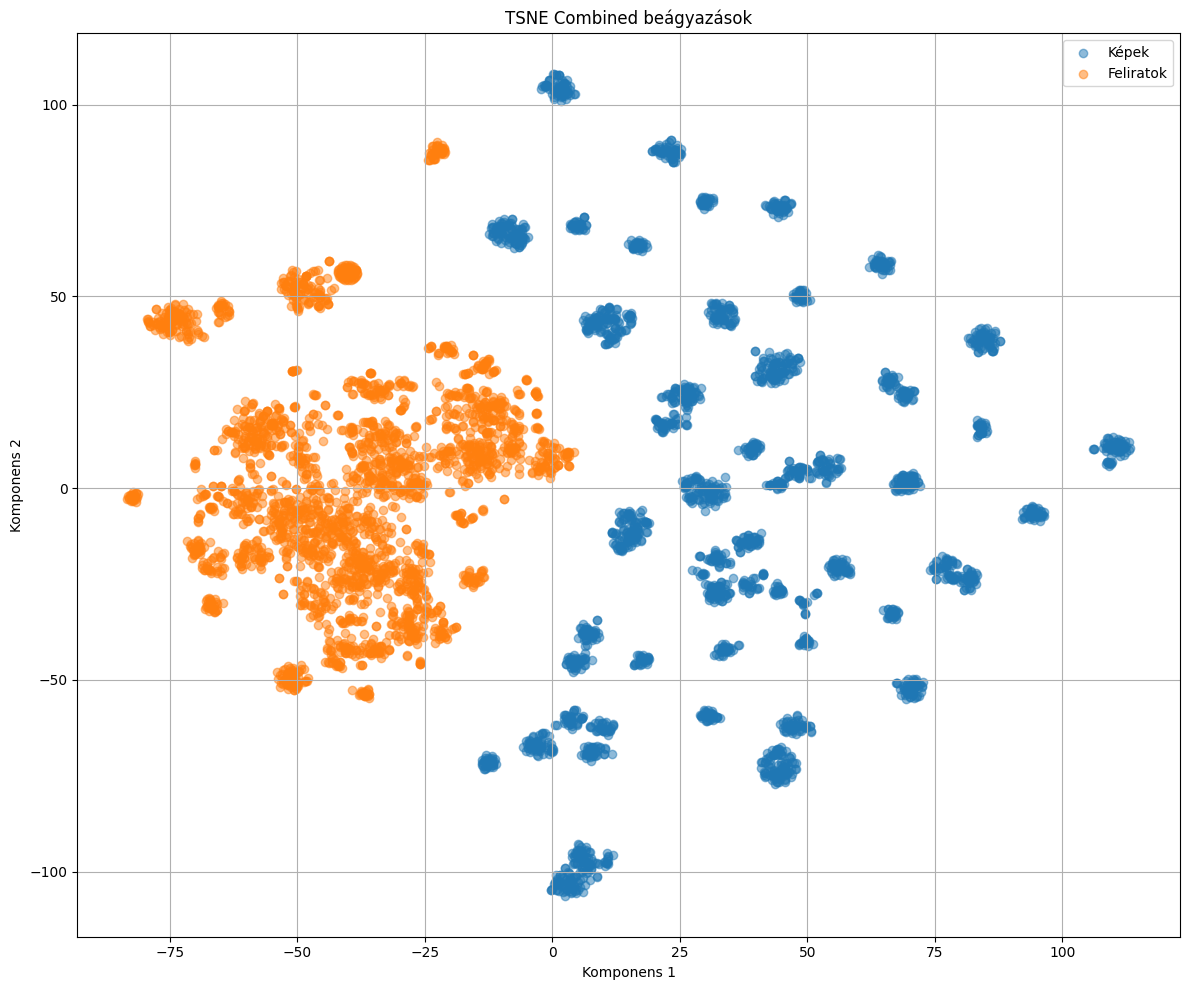

/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


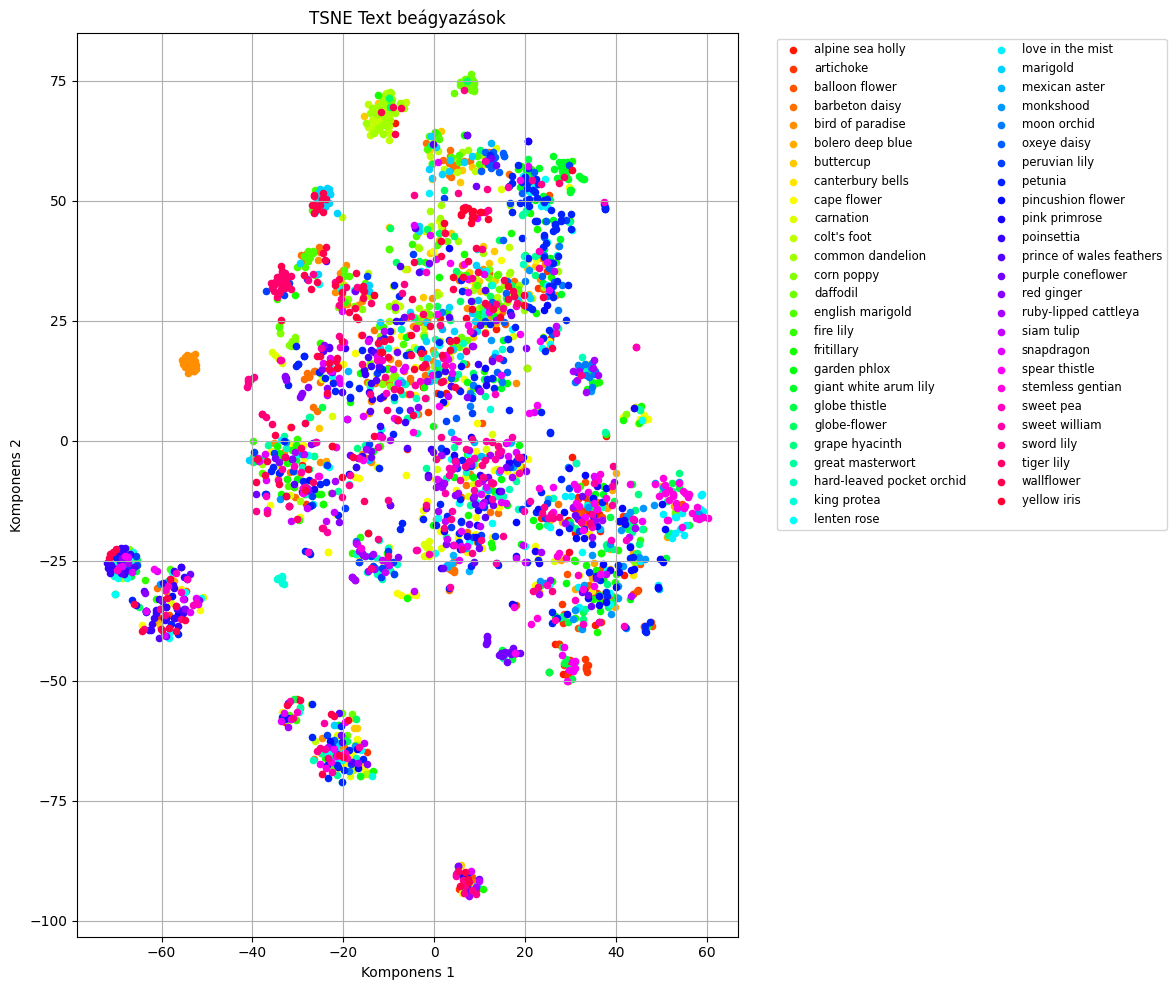

In [ ]:
plotter = EmbeddingPlotter("/content/drive/MyDrive/AI_in_Data_Science/projekt_munka_viragok/flower_embeddings_without_label.json")

plotter.plot(method="tsne", use="combined")
plotter.plot(method="tsne", use="text")

#### A modell megkapta és használhatta a leírásban a virágok fajtáját

/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


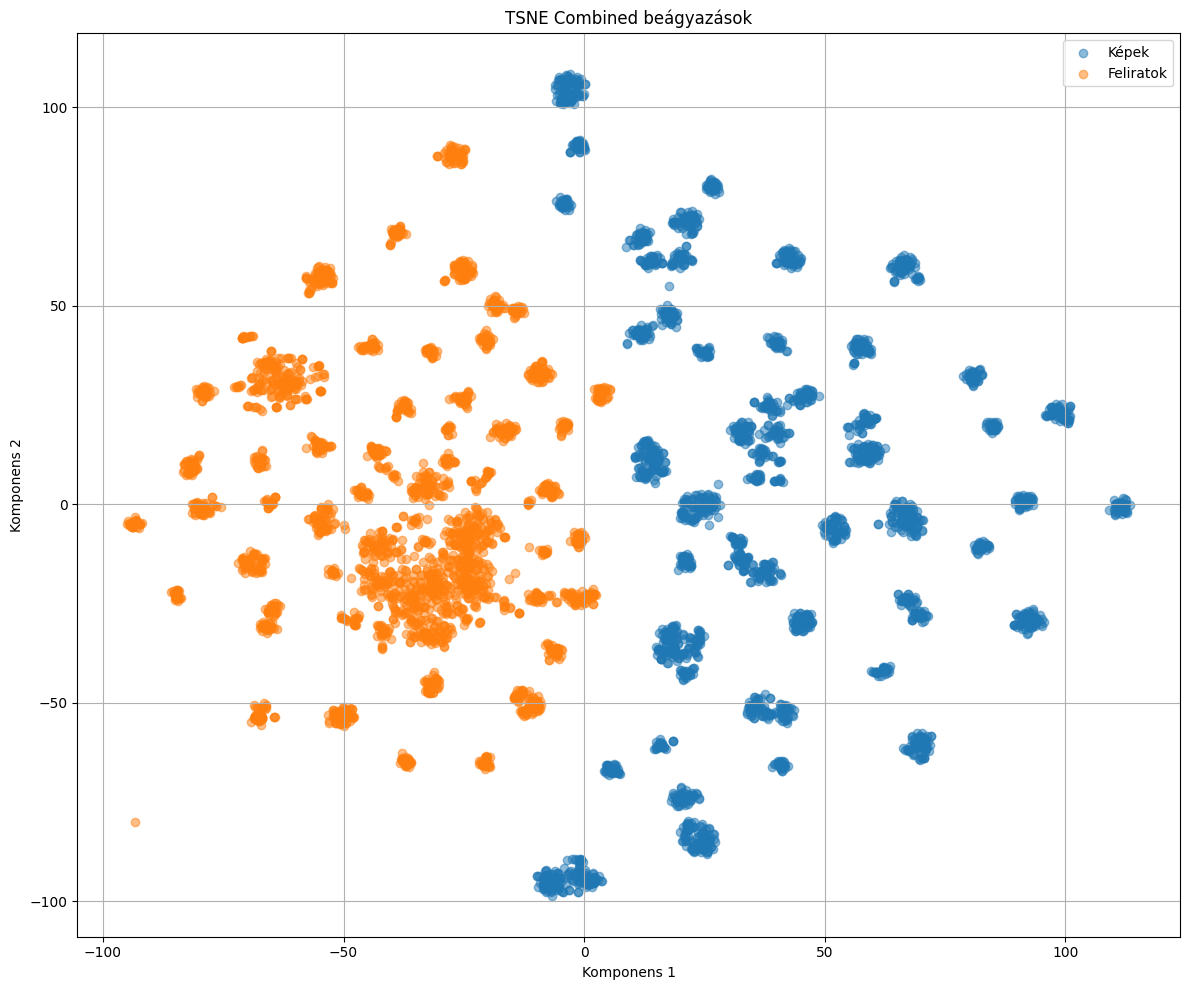

/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


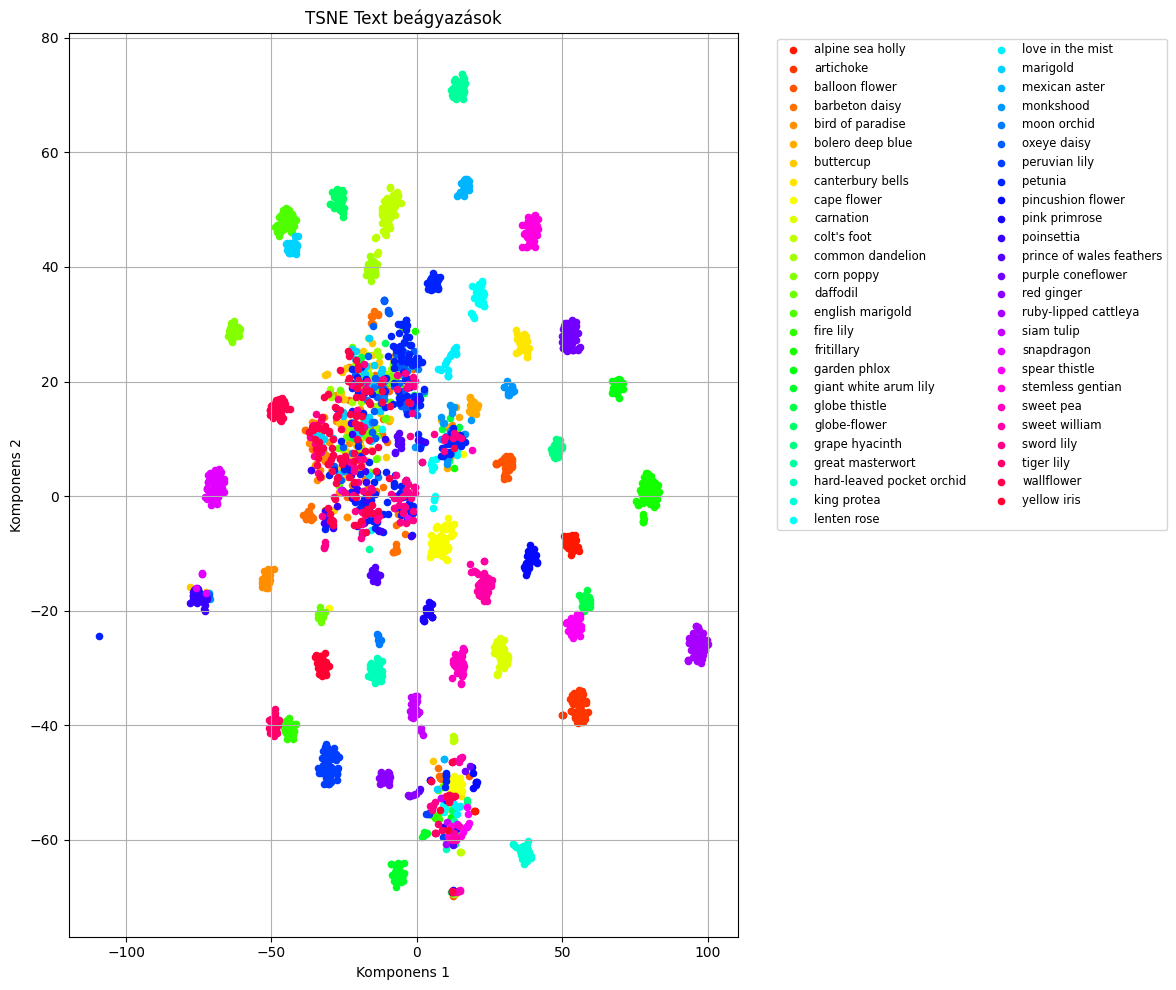

In [ ]:
plotter = EmbeddingPlotter("/content/drive/MyDrive/AI_in_Data_Science/projekt_munka_viragok/flower_embeddings_with_label.json")

plotter.plot(method="tsne", use="combined")
plotter.plot(method="tsne", use="text")

### Classifikációs feladat logiszikus regreszió használatával, ahol a különböző embeddingeket classifikáljuk 90-10% elosztásban (ahol az egyes osztályokra van szétbontva 90-10 arányban)

In [ ]:
# Text Embedding Classification using Logistic Regression
text_classifier_with_label = EmbeddingClassifier(
    json_path='/content/drive/MyDrive/AI_in_Data_Science/projekt_munka_viragok/flower_embeddings_with_label.json',
    embedding_type='text embedding',
    model_type='logistic'
)
text_classifier_with_label.run()

text_classifier_without_label = EmbeddingClassifier(
    json_path='/content/drive/MyDrive/AI_in_Data_Science/projekt_munka_viragok/flower_embeddings_without_label.json',
    embedding_type='text embedding',
    model_type='logistic'
)
text_classifier_without_label.run()

text_classifier_with_label_without_name = EmbeddingClassifier(
    json_path='/content/drive/MyDrive/AI_in_Data_Science/projekt_munka_viragok/flower_embeddings_with_label_without_name.json',
    embedding_type='text embedding',
    model_type='logistic'
)
text_classifier_with_label_without_name.run()

# Image Embedding Classification using Random Forest
image_classifier = EmbeddingClassifier(
    json_path='/content/drive/MyDrive/AI_in_Data_Science/projekt_munka_viragok/flower_embeddings_with_label.json',
    embedding_type='image embedding',
    model_type='logistic'
)
image_classifier.run()



--- Kiértékelési jelentés text embedding használatával logistic modell esetén ---
                           precision    recall  f1-score   support

         alpine sea holly       1.00      1.00      1.00         3
                artichoke       1.00      1.00      1.00         6
           balloon flower       1.00      1.00      1.00         4
           barbeton daisy       0.56      0.50      0.53        10
         bird of paradise       0.50      0.57      0.53         7
         bolero deep blue       1.00      0.67      0.80         3
                buttercup       0.40      0.33      0.36         6
         canterbury bells       1.00      1.00      1.00         4
              cape flower       1.00      1.00      1.00         9
                carnation       1.00      0.80      0.89         5
              colt's foot       1.00      1.00      1.00         7
         common dandelion       0.56      0.71      0.62         7
               corn poppy       1.00      1.0

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



--- Kiértékelési jelentés text embedding használatával logistic modell esetén ---
                           precision    recall  f1-score   support

         alpine sea holly       0.00      0.00      0.00         3
                artichoke       0.22      0.33      0.27         6
           balloon flower       0.00      0.00      0.00         4
           barbeton daisy       0.20      0.20      0.20        10
         bird of paradise       0.50      0.43      0.46         7
         bolero deep blue       1.00      0.33      0.50         3
                buttercup       0.25      0.17      0.20         6
         canterbury bells       1.00      0.75      0.86         4
              cape flower       0.23      0.33      0.27         9
                carnation       0.00      0.00      0.00         5
              colt's foot       0.50      0.71      0.59         7
         common dandelion       0.40      0.57      0.47         7
               corn poppy       0.50      0.6

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



--- Kiértékelési jelentés image embedding használatával logistic modell esetén ---
                           precision    recall  f1-score   support

         alpine sea holly       1.00      1.00      1.00         3
                artichoke       1.00      1.00      1.00         6
           balloon flower       1.00      1.00      1.00         4
           barbeton daisy       1.00      1.00      1.00        10
         bird of paradise       1.00      1.00      1.00         7
         bolero deep blue       1.00      1.00      1.00         3
                buttercup       1.00      1.00      1.00         6
         canterbury bells       1.00      1.00      1.00         4
              cape flower       1.00      1.00      1.00         9
                carnation       1.00      1.00      1.00         5
              colt's foot       1.00      1.00      1.00         7
         common dandelion       1.00      1.00      1.00         7
               corn poppy       1.00      1.

### Visszakeresés, hogy melyik text embeddingek voltak a leghasonlóbbak a hozzájuk tartozó kép embeddingekhez

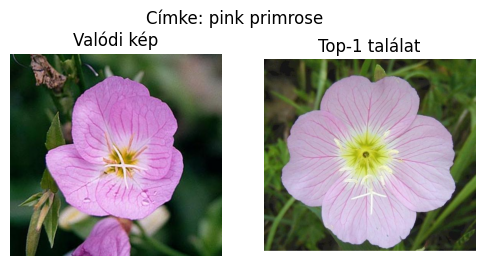

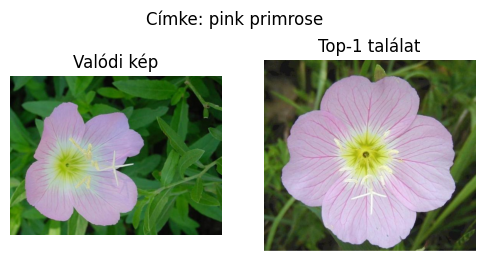

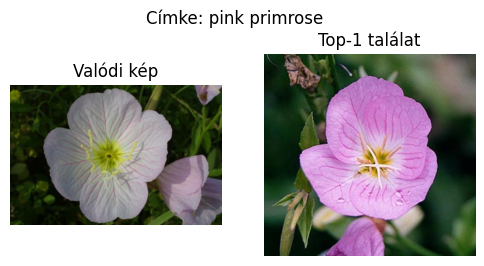

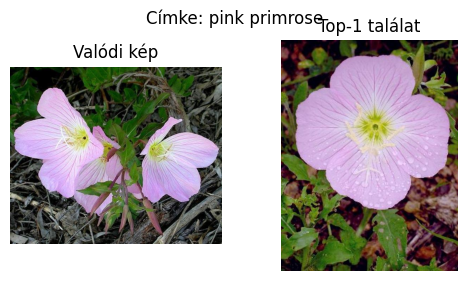

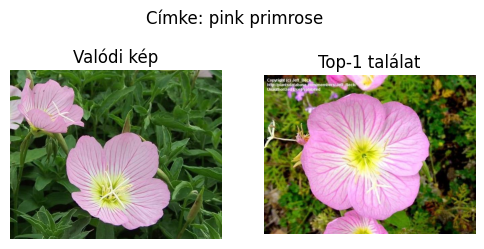

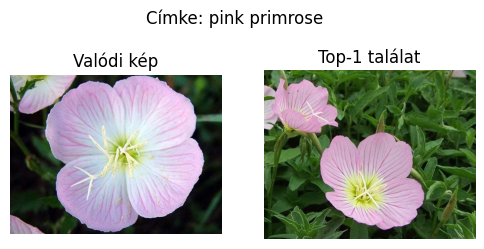

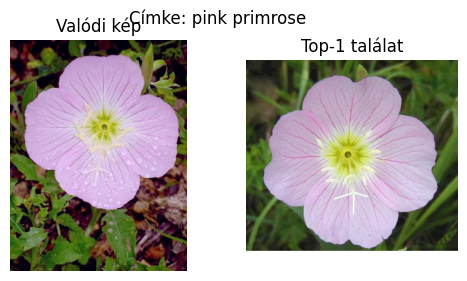

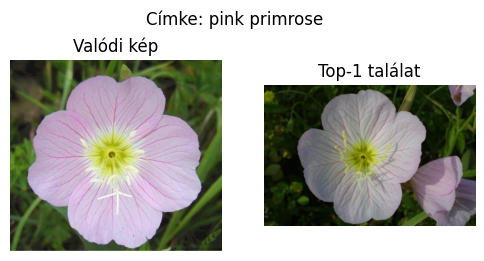

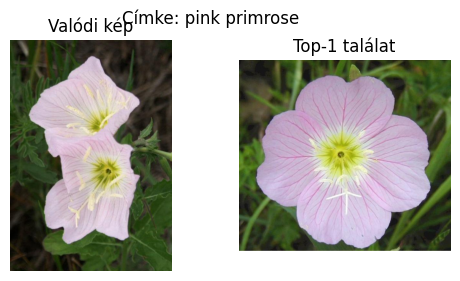

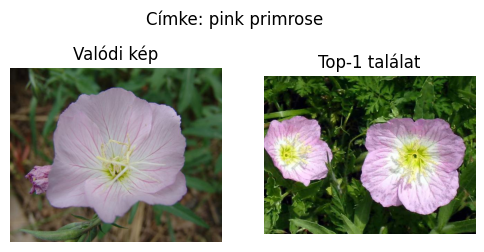

In [4]:
evaluator = EmbeddingSimilarityEvaluator('/content/drive/MyDrive/AI_in_Data_Science/projekt_munka_viragok/flower_embeddings_with_label.json')

evaluator.run_retrieval_evaluation(
    k=1,
    num_examples=10,
    labels_to_show=["pink primrose"],
    show_correct=False,
    use_csls=True
)


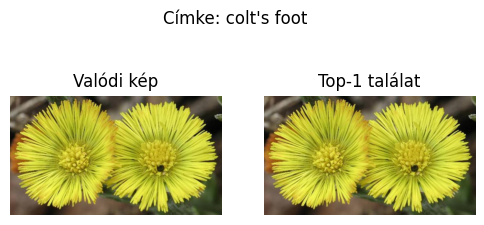

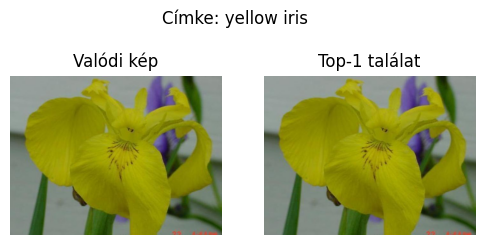

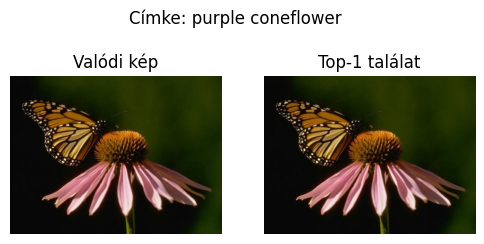

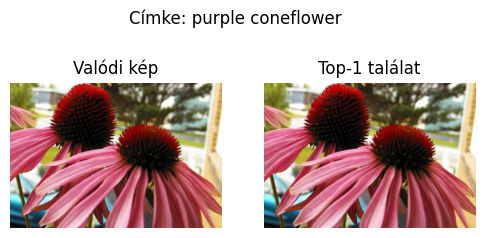

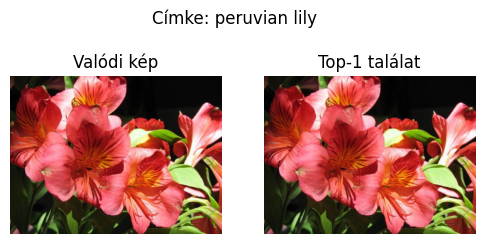

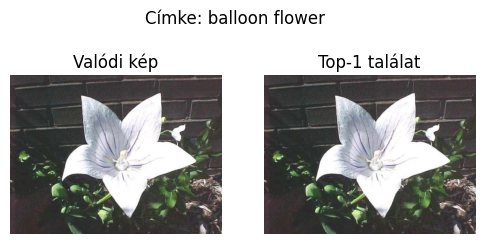

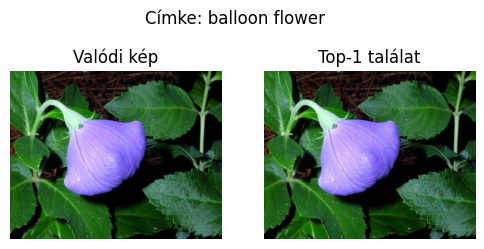

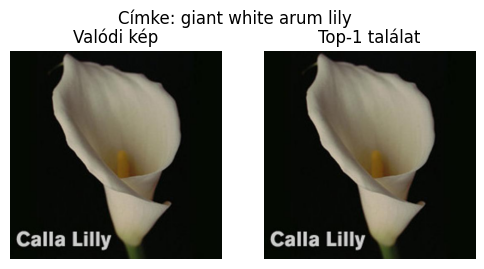

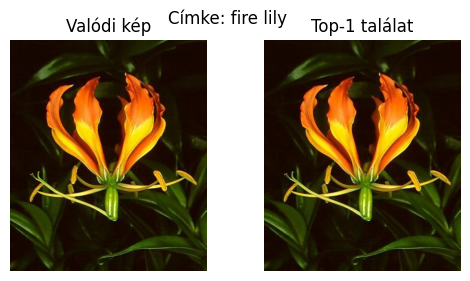

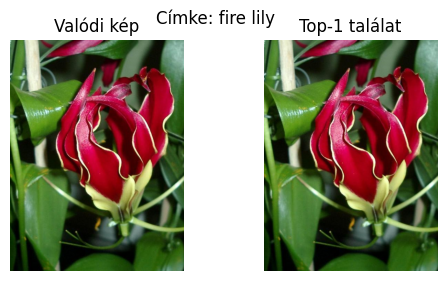

In [7]:
evaluator = EmbeddingSimilarityEvaluator('/content/drive/MyDrive/AI_in_Data_Science/projekt_munka_viragok/flower_embeddings_without_label.json')

evaluator.run_retrieval_evaluation(
    k=1,
    num_examples=10,
    #labels_to_show=["pink primrose"],
    show_correct=True,
    use_csls=True
)


In [9]:
paths = [
    "/content/drive/MyDrive/AI_in_Data_Science/projekt_munka_viragok/flower_embeddings_without_label.json",
    "/content/drive/MyDrive/AI_in_Data_Science/projekt_munka_viragok/flower_embeddings_with_label_without_name.json",
    "/content/drive/MyDrive/AI_in_Data_Science/projekt_munka_viragok/flower_embeddings_with_label.json"
]

results = []
for path in paths:
    evaluator = EmbeddingSimilarityEvaluator(path)
    evaluator.load_embeddings()
    results.append(evaluator.evaluate_all(k=5))

df_results = pd.DataFrame(results)
csv_path = "/content/drive/MyDrive/AI_in_Data_Science/projekt_munka_viragok/similarity_evaluation_results.csv"
df_results.to_csv(csv_path, index=False)
df_results

Captionings  top1cosine-image  \
0            flower_embeddings_without_label.json          0.005106   
1  flower_embeddings_with_label_without_name.json          0.003927   
2               flower_embeddings_with_label.json          0.021064   

   top5cosine-image  top1csls-image  top5csls-image  top1cosine-class  \
0          0.026623        0.008388        0.030635          0.195478   
1          0.023206        0.006426        0.026419          0.161371   
2          0.089968        0.022135        0.105677          0.579079   

   top5cosine-class  top1csls-class  top5csls-class  
0          0.287746        0.193654        0.291393  
1          0.256694        0.163870        0.273831  
2          0.671546        0.570154        0.671189